In [1]:
from bokeh.io import output_file,show,output_notebook,push_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource,HoverTool,BoxSelectTool
from bokeh.layouts import row,column,gridplot
from bokeh.models.widgets import Tabs,Panel
output_notebook()
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import collections


In [2]:
import numpy as np
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [3]:
#Extracting the train and test
from zipfile import ZipFile

TrainFile = "/content/Train.zip"
TestFile = "/content/Test.zip"

with ZipFile(TrainFile, 'r') as zip:
	zip.printdir()
	print('Extracting all the files now...')
	zip.extractall()
	print('Done!')

File Name                                             Modified             Size
Train/1.jpg                                    2022-12-06 22:20:32          582
Train/10.jpg                                   2022-12-06 22:20:32          591
Train/100.jpg                                  2022-12-06 22:20:32          579
Train/1000.jpg                                 2022-12-06 22:20:32          573
Train/1001.jpg                                 2022-12-06 22:20:32          532
Train/1002.jpg                                 2022-12-06 22:20:32          552
Train/1003.jpg                                 2022-12-06 22:20:34          510
Train/1004.jpg                                 2022-12-06 22:20:34          575
Train/1005.jpg                                 2022-12-06 22:20:34          575
Train/1006.jpg                                 2022-12-06 22:20:34          495
Train/1007.jpg                                 2022-12-06 22:20:34          543
Train/1008.jpg                          

In [4]:
with ZipFile(TestFile, 'r') as zip:
	zip.printdir()
	print('Extracting all the files now...')
	zip.extractall()
	print('Done!')


File Name                                             Modified             Size
Test/1.jpg                                     2022-12-06 22:20:20          538
Test/10.jpg                                    2022-12-06 22:20:20          579
Test/100.jpg                                   2022-12-06 22:20:22          517
Test/101.jpg                                   2022-12-06 22:20:22          575
Test/102.jpg                                   2022-12-06 22:20:22          604
Test/103.jpg                                   2022-12-06 22:20:22          556
Test/104.jpg                                   2022-12-06 22:20:22          548
Test/105.jpg                                   2022-12-06 22:20:22          600
Test/106.jpg                                   2022-12-06 22:20:22          554
Test/107.jpg                                   2022-12-06 22:20:22          561
Test/108.jpg                                   2022-12-06 22:20:22          621
Test/109.jpg                            

In [5]:
# creating the XTilda (train)
path = "/content/Train/"
XTilda = np.ones([2400, 785])
for i in range(2400):
  curri = i+1
  newpath = path + str(curri) + ".jpg"
  img = Image.open(newpath)
  image = np.asarray(img).flatten()
 
  image = np.append(image, [1])
#  print(image[1])
  XTilda[i] =  image

In [6]:
#function to get the t

def getT(number):
    T = np.ones([2400])
    T *= -1
    start =  number*240
    for i in range (240):
        T[start+i] *=-1
    return T

In [7]:
# array that has all the possible Ts 
Ts=[]
for i in range(10):
  Ts.append(getT(i))
Ts

[array([ 1.,  1.,  1., ..., -1., -1., -1.]),
 array([-1., -1., -1., ..., -1., -1., -1.]),
 array([-1., -1., -1., ..., -1., -1., -1.]),
 array([-1., -1., -1., ..., -1., -1., -1.]),
 array([-1., -1., -1., ..., -1., -1., -1.]),
 array([-1., -1., -1., ..., -1., -1., -1.]),
 array([-1., -1., -1., ..., -1., -1., -1.]),
 array([-1., -1., -1., ..., -1., -1., -1.]),
 array([-1., -1., -1., ..., -1., -1., -1.]),
 array([-1., -1., -1., ...,  1.,  1.,  1.])]

In [8]:
# array that has the 10 WTildas
# WTilda=(XTildaTranspose . XTilda )-1 . XTildaTranspose .t
Ws=[]

for i in range(10):
  #XTildaTranspose
  Xtranspose = XTilda.transpose()
  #XTildaTranspose . XTilda
  FdotProduct = Xtranspose.dot(XTilda)
  #(XTildaTranspose . XTilda )-1
  inverse = np.linalg.pinv(FdotProduct)
  #(XTildaTranspose . XTilda )-1 . XTildaTranspose
  Xs = inverse.dot(Xtranspose)
  #(XTildaTranspose . XTilda )-1 . XTildaTranspose .t
  W=Xs.dot(Ts[i])
  Ws.append(W)

W0=Ws[0]
W1=Ws[1]
W2=Ws[2]
W3=Ws[3]
W4=Ws[4]
W5=Ws[5]
W6=Ws[6]
W7=Ws[7]
W8=Ws[8]
W9=Ws[9]
#Testing that the tildas are different
if collections.Counter(W7) == collections.Counter(W9):
    print ("The lists are identical")
else :
    print ("The lists are not identical")

#This is to make sure that the Ws are different than each other and correct

The lists are not identical


In [9]:
#This is to add all the test pictures in an array
# each element is the x in y(x)
Tests = []
path="/content/Test/"
for i in range(200):
   curri = i+1
   newpath = path + str(curri) + ".jpg"
   img = Image.open(newpath)
   image = np.asarray(img).flatten()
   image = np.append(image, [1])
   Tests.append(image)

Tests


[array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [10]:
# array that tests the 200 images,
results= np.ones([200])

for i in range(200):
    Y = np.zeros([10])
    # Y is an array that tries the test picture on all possible classes
    for j in range(10):
      #  y(X)=WTrans . X + Wo
        WTrans=Ws[j].transpose()
        Y[j] =  WTrans.dot(Tests[i])+Ws[j][-1]
        #now we need to calculate the max number in Y for each class
    max = np.amax(Y)
    index = np.where(Y == max)
    results[i] = index[0][0]

results

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 6., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 2., 2., 0., 4., 5., 2., 0.,
       2., 1., 5., 2., 2., 4., 2., 2., 2., 1., 3., 3., 3., 5., 3., 3., 3.,
       3., 1., 3., 3., 3., 3., 3., 3., 3., 6., 5., 0., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 0., 5.,
       0., 6., 5., 5., 5., 5., 5., 5., 9., 5., 6., 5., 5., 5., 5., 5., 5.,
       5., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 7., 7., 7., 7., 7., 7., 7., 7., 7., 9., 7., 7., 1.,
       7., 4., 7., 7., 7., 7., 4., 1., 1., 8., 1., 5., 8., 8., 8., 9., 8.,
       8., 8., 8., 0., 8., 1., 5., 7., 8., 5., 9., 7., 9., 7., 7., 4., 1.,
       5., 9., 9., 4., 9., 9., 9., 7., 0., 9., 0., 9., 9.])

In [11]:
def confusionMat(original, result):
    cm = np.zeros([10, 10])
    for i in range(len(original)):
        cm[int(original[i])][int(result[i])] += 1
        
    return cm.astype(int)

In [12]:
originalLabels = np.genfromtxt("/content/Test/Test Labels.txt", delimiter = ",")
originalLabels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8.,
       8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 9., 9., 9., 9., 9., 9., 9.,
       9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9.])

In [13]:
cm = confusionMat(originalLabels, results)
cm

array([[19,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0, 20,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  3, 11,  0,  2,  2,  0,  0,  0,  0],
       [ 1,  2,  0, 14,  0,  2,  1,  0,  0,  0],
       [ 0,  0,  0,  0, 19,  1,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0, 15,  2,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 20,  0,  0,  0],
       [ 0,  1,  0,  0,  2,  0,  0, 16,  0,  1],
       [ 1,  4,  0,  0,  0,  3,  0,  1, 10,  1],
       [ 2,  1,  0,  0,  2,  1,  0,  4,  0, 10]])

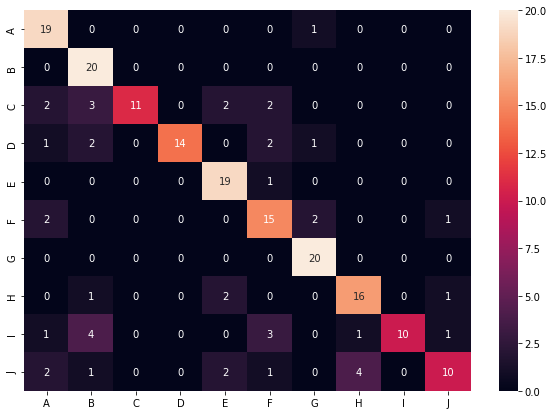

In [15]:
df_cm = pd.DataFrame(cm, index = [i for i in "ABCDEFGHIJ"],
                  columns = [i for i in "ABCDEFGHIJ"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
results_path = 'Confusion.png'
#print(results_path)
plt.savefig(results_path, dpi=400)